In [1]:
# Importer biblioteker som trengs
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
# Importerer datasettet
df = pd.read_csv('datasett.csv')

In [3]:
# Tar en titt på dataen
df.head(20)

,documentDate,picturedate,lastchanged,adcreated,price,listprice,lat,lng,address,apartmentnumber,...,F_Turterreng,adtitle,N_modernisering,N_oppussing,N_regulert,N_garasjemulighet,postcode,Parking,price_inc_debt,area_id
0,2020-09-25,2020/7,2020-08-07,2020-08-03,5150000,4650000.0,59.913030,10.776672,"Hagegata 41, 0653 Oslo",H0703,...,NaN,VISNING AVLYST! Direkte bud til selger. Topple...,False,False,False,False,653,1,5150000.0,1
1,2020-09-29,2020/8,2020-12-14,2020-08-25,3900000,3650000.0,59.918900,10.647900,"Skogbrynet 16D, 0283 Oslo",U0101,...,1.0,Innbydende og lys 2-roms hjørneleilighet - Ves...,False,False,False,False,283,1,3944838.0,6
2,2021-12-02,2021/8,2021-08-01,2021-07-27,9900000,8750000.0,59.879000,10.799300,"Ringshusveien 8B, 1176 Oslo",H0101,...,1.0,Oppussingsobjekt - Enebolig i kjede med skjerm...,False,True,False,False,1176,1,9900000.0,14
3,2009-11-12,4/186,2009-09-05,2009-08-24,1660000,1680000.0,59.887690,10.802634,"Libakkfaret 1 A, 1184 Oslo",H0302,...,NaN,BRATTLIKOLLEN - Lys og gjennomgående 3-roms se...,False,False,False,False,1184,0,1678207.0,14
4,2012-10-24,2012/6,2012-06-15,2012-06-01,5760000,5490000.0,59.944653,10.888134,"Micheletveien 20, 1053 Oslo",U0102,...,NaN,GAMLE FURUSET - Velholdt og romslig enebolig m...,False,False,False,False,1053,0,5760000.0,12
5,2015-07-08,2015/5,2020-06-11,2015-05-02,2600000,2190000.0,59.934440,10.774304,"Edmund Neuperts gate 3, 0475 Oslo",H0302,...,1.0,"TORSHOV - STRØKEN 2-ROMS I 3.ETG. I POPULÆRE ""...",False,False,False,False,475,0,2685111.0,3
6,2008-07-25,9/139,2008-07-06,2008-06-27,2550000,2600000.0,59.889133,10.778798,"Høgdefaret 10, 1178 Oslo",H0102,...,NaN,Holtet Hageby - 1/4 part av firemannsbolig . p...,False,False,False,False,1178,0,2550000.0,14
7,2017-03-06,2016/12,2016-12-11,2016-12-02,3390000,3090000.0,59.965298,10.921401,"Ellen Gleditch vei 4, 0987 Oslo",H0301,...,NaN,BOLIGEN ER SOLGT. VISNING AVLYST,False,False,False,False,987,0,3459535.0,11
8,2011-12-14,2011/10,2019-02-24,2011-10-13,1925000,1990000.0,59.948322,10.766691,"Nydalen Allé 5, 0484 Oslo",H0209,...,1.0,Solsiden i Nydalen - Lys og pen eierleilighet ...,False,False,False,False,484,0,1925000.0,8
9,2015-12-02,2015/8,2015-08-27,2015-08-07,5350000,4390000.0,59.954710,10.856106,"Sølve Solfengs vei 27 B, 0956 Oslo",H0101,...,1.0,"Rødtvet - Lekkert rekkehus m/garasje, solrike ...",False,False,False,False,956,1,5350000.0,10


In [4]:
# Printer litt info om datasettet
print(f"Antall rader i datasettet: {len(df)}")
print(f"Antall kolonner i datasettet: {len(df.columns)}")
print()
print(df.columns)

Antall rader i datasettet: 181250
Antall kolonner i datasettet: 57

Index(['documentDate', 'picturedate', 'lastchanged', 'adcreated', 'price',
       'listprice', 'lat', 'lng', 'address', 'apartmentnumber',
       'apartmenttype', 'conveyancetype', 'finncode', 'BRA', 'PROM',
       'buildyear', 'matrikkel', 'bedrooms', 'rooms', 'bathrooms', 'WC',
       'elevator', 'floor', 'housingtype', 'commondebt', 'commoncosts',
       'F_Aircondition', 'F_Alarm', 'F_BalkongTerrasse', 'F_Barnevennlig',
       'F_Bredbåndstilknytning', 'F_Fellesvaskeri', 'F_GarasjeP-plass',
       'F_Heis', 'F_Ingen gjenboere', 'F_Lademulighet', 'F_Livsløpsstandard',
       'F_Moderne', 'F_Offentlig vannkloakk', 'F_Parkett', 'F_PeisIldsted',
       'F_Rolig', 'F_Sentralt', 'F_Utsikt', 'F_Vaktmester-vektertjeneste',
       'F_Bademulighet', 'F_Fiskemulighet', 'F_Turterreng', 'adtitle',
       'N_modernisering', 'N_oppussing', 'N_regulert', 'N_garasjemulighet',
       'postcode', 'Parking', 'price_inc_debt', 'area_id

In [5]:
#df.info()
#df.describe()

In [6]:
# Sjekker null-verdier
df.isnull().sum()

documentDate                        0
picturedate                       257
lastchanged                         0
adcreated                           0
price                               0
listprice                           0
lat                              1568
lng                              1568
address                             0
apartmentnumber                   822
apartmenttype                     792
conveyancetype                      0
finncode                            0
BRA                              3273
PROM                                0
buildyear                         925
matrikkel                           0
bedrooms                         9385
rooms                           51910
bathrooms                           0
WC                                  0
elevator                          792
floor                           37977
housingtype                         0
commondebt                      58689
commoncosts                     15759
F_Airconditi

Som vi kan se så finnes det null-verdier for flere av variablene. Dette er helt vanlig i større datasett og er et problem vi må gjøre noe med. Alle null-verdiene for variabler som starter med F_ (fasteliteter), vil bli kodet om til 0, da dette er dummy-variabler med 0 og 1 som verdi. Videre ser vi at rom og etasje er de to variablene med flest null-verdier (henholdsvis 51 910 og 37 977). Det finnes også et høyt antall null-verider for fellesgjeld og felleskostnader, men dette er knyttet til eneboliger og rekkehus hvor man ikke har disse kostnadene.

In [7]:
df['housingtype'].value_counts()

Leilighet                157774
Enebolig                  10180
Rekkehus                   7491
Tomannsbolig               5638
Andre                        66
Tomter                       55
Bygård/Flermannsbolig        29
Annet fritid                  6
Garasje/Parkering             5
Gårdsbruk/Småbruk             2
warehouse                     1
multipurposearea              1
business                      1
Kontor                        1
Name: housingtype, dtype: int64

Vi starter med å se hvordan fordelingen av de ulike boligformene er i datasettet, og observerer at 87% av datapunktene i datasetter er leiligheter. I bydelene som er nærmest sentrum er over 90% av boliger leiligheter, mens i bydelene som ligger lengre borte fra sentrum er leilighetsandelen ned mot 40% på det laveste. Vi kan observere at det finnes 167 datapunkter som ikke er leilighet, enebolig, rekkehus eller tomannsbolig. Disse datapunktene vil ikke være relevante for oss så vi velger å utelate dem fra datasettet.

In [8]:
feil_bolig = ['Andre','Tomter','Bygård/Flermannsbolig','Annet fritid','Garasje/Parkering','Gårdsbruk/Småbruk','Kontor','multipurposearea','warehouse','business']

for cat in feil_bolig:
    df.drop(df[df['housingtype'] == cat].index, inplace=True)

df['housingtype'].value_counts()


Leilighet       157774
Enebolig         10180
Rekkehus          7491
Tomannsbolig      5638
Name: housingtype, dtype: int64

Den neste variabelen vi skal se på er lengde/breddegrad variablene (lat,lng). Vi vet at Oslo ligger rundt breddegrad 59-60 og rundt lengdegrad 10. Dermed vil koordinater som avviker mye fra disse koordinatene være feil.

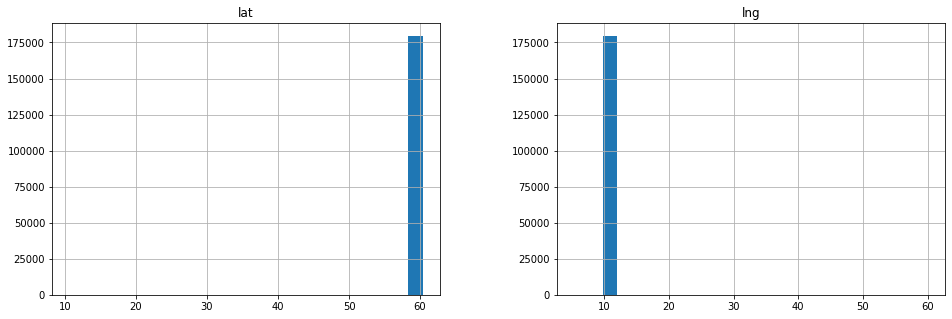

In [9]:
df[['lat','lng']].hist(figsize=(16,5), bins=25)
plt.show()

Som vi ser så treffer alle koordinatene på Oslo-området. Vi skal nå ta en titt på null-verdiene til datapunktene.

In [10]:
# Printer null-verdier for lat or lng
df[['lat','lng']].isnull().sum()

lat    1567
lng    1567
dtype: int64

Som vi kan se så har vi 1567 datapunkter som mangler lengde og breddegrader. En løsning vil da være å fjerne null-verdiene, men dette vil ikke være optimalt. Vi vil derfor prøve å finne koordinater for hver av de 16 bydelene, for deretter å erstatte null-verdiene med dette. Vi må derfor først lage koordinater for de 16 bydelene, for deretter å erstatte null-verdiene med disse. Koordinatene til bydelene vil være sentrum av bydelen.

In [11]:
#Dictionary med bydeler (area_id) og tilsvarende koordinater til sentrum av bydelene
bydeler_koordinater = {1:[59.911832, 10.789224], 2:[59.923818, 10.771007],3:[59.938290, 10.764674],
4:[59.927053, 10.738491],5:[59.915947, 10.705421],6:[59.927271, 10.664877],7:[59.950695, 10.657639],
8:[59.956516, 10.766631],9:[59.937116, 10.820808],10:[59.954572, 10.876033],11:[59.958182, 10.924858],
12:[59.935980, 10.877371],13:[59.888390, 10.835148],14:[59.875677, 10.789629],15:[59.832622, 10.826528],
16:[59.910462, 10.737319]}

#Oppretter nye kolonner for lat/lng til bydelene
df['Bydel_lat'] = df['area_id']
df['Bydel_lng'] = df['area_id']

#Endrer fra area_id til koordinater for bydelene
for key, item in bydeler_koordinater.items():
    df['Bydel_lat'].mask(df['Bydel_lat'] == key, item[0], inplace=True)
    df['Bydel_lng'].mask(df['Bydel_lng'] == key, item[1], inplace=True)

#Fyller inn null-verdier med tilsvarende koordinater for bydelene
df['lat'] = df['lat'].fillna(df['Bydel_lat'])
df['lng'] = df['lng'].fillna(df['Bydel_lng'])

Den neste variabelen vi skal se på er bruksareal (BRA). Det første vi må gjøre er å se på fordelingen for å kunne identifisere feil-verdier. BRA vil i de fleste tilfeller ligge mellom 50-100 for leiligheter, og 150-300 for større enebolig. Dette er det selvfølgelig unntak for med større leiligheter og boliger. Dermed vil det være vanskelig å skille mellom hva som er reelle store boliger, og hva som er feilverdier. En løsning er å fjerne verdier som er over 500 for eneboliger, rekkehus og tomannsboliger, hvis man har en pris som er under 10 000 000. Det er fordi boliger på >500 kvm vil så si alltid koste over 10 M. For leiligheter kan man fjerne verdier over 350 kvm hvis prisen er under 10M. Til slutt vil vi fjerne alle boliger med 1000 > BRA > 10 pga dette er åpenbare feildata etter å ha inspisert datapunktene.

 

In [12]:
#Fjerner alle boliger med BRA>500 og pris<10 000 000
df.drop(df[(df['BRA'] > 500) & (df['price'] < 10000000)].index, inplace = True)
#Fjerner alle leiligheter med BRA>350 og pris<10 000 000
df.drop(df[(df['BRA'] > 350) & (df['housingtype'] == 'Leilighet') & (df['price'] < 10000000)].index, inplace = True)
#Fjerner alle boliger med BRA > 1000
df.drop(df[df['BRA'] > 1000].index, inplace = True)
#Fjerner alle boliger med BRA < 10
df.drop(df[df['BRA'] < 10].index, inplace = True)

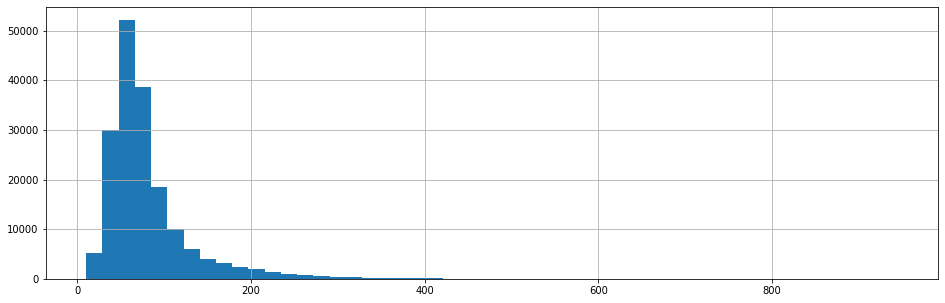

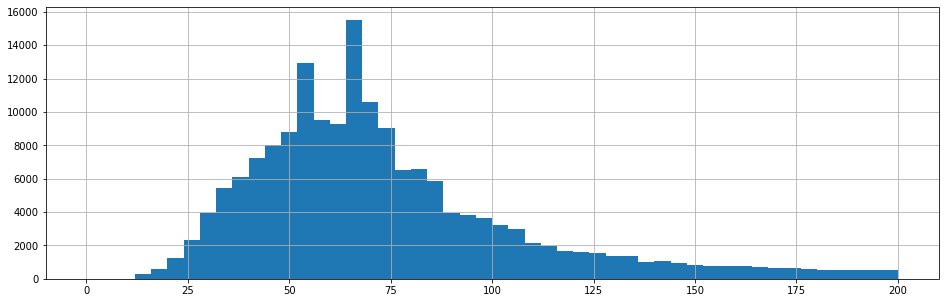

In [13]:
#Printer histogram over fordelingen
df['BRA'].hist(bins=50, figsize=(16,5))
plt.show()
#Printer histogram over fordelingen mellom 0 og 200 kvm
df['BRA'].hist(bins=50, figsize=(16,5), range=[0,200])
plt.show()

Som vi kan se så er dataen høyreskjev, noe som vil være naturlig da det finnes langt flere små boliger. Videre må vi nå gjøre noe med null-verdiene. Siden BRA henger tett sammen med primærrom (PROM), så vil en brukbar løsning være å finne forholdet mellom disse variablene og deretter bruke det for å generere BRA hvor man ikke har dette oppgitt.

In [14]:
#Printer korrelasjonen mellom PROM og BRA
print(df[['PROM','BRA']].corr())

          PROM       BRA
PROM  1.000000  0.963266
BRA   0.963266  1.000000


In [15]:
#Erstatter alle null-verdier for BRA med tilhørende PROM / 0.963464
df['BRA'] = df['BRA'].fillna((df['PROM']/0.963464).round())

Den neste variabelen vi skal se på er byggeår. Vi starter da med å få en oversikt over fordelingen av dataen. I datasettet vårt er de eldste boligene fra tidlig 1600 tallet. Vi kan derfor fjerne alle boliger som har oppført byggeår før dette. Det vil fortsatt kunne være feil i dataen, men det er rimelig å anta at det finnes et fåtall av boliger med byggeår så langt tilbake. Videre vil vi da få en veldig venstreskjev fordeling hvor man begynner å få data fra midten av 1800-tallet. 

I tillegg finnes det rett under 1000 null-verdier som vi velger å fjerne da det vil være vanskelig å beregne et alternativt byggeår.

In [39]:
#Fjerner alle boliger med byggeår < 1600
df.drop(df[df['buildyear'] < 1600].index, inplace = True)
#Fjerner null-verdier
df = df[df['buildyear'].notna()]
df['buildyear'].isnull().sum()

0

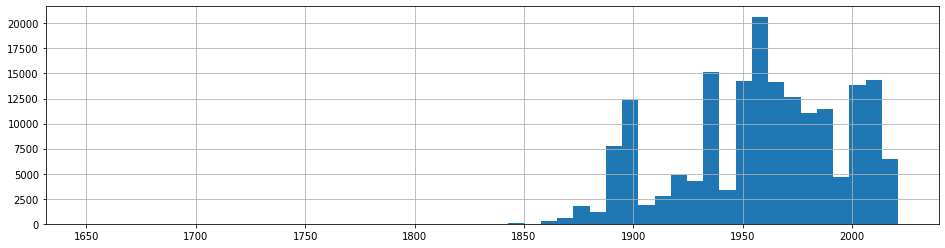

In [17]:
df['buildyear'].hist(bins=50, figsize=(16,4))
plt.show()

In [40]:
df.head()

,documentDate,picturedate,lastchanged,adcreated,price,listprice,lat,lng,address,apartmentnumber,...,N_modernisering,N_oppussing,N_regulert,N_garasjemulighet,postcode,Parking,price_inc_debt,area_id,Bydel_lat,Bydel_lng
0,2020-09-25,2020/7,2020-08-07,2020-08-03,5150000,4650000.0,59.913030,10.776672,"Hagegata 41, 0653 Oslo",H0703,...,False,False,False,False,653,1,5150000.0,1,59.911832,10.789224
1,2020-09-29,2020/8,2020-12-14,2020-08-25,3900000,3650000.0,59.918900,10.647900,"Skogbrynet 16D, 0283 Oslo",U0101,...,False,False,False,False,283,1,3944838.0,6,59.927271,10.664877
2,2021-12-02,2021/8,2021-08-01,2021-07-27,9900000,8750000.0,59.879000,10.799300,"Ringshusveien 8B, 1176 Oslo",H0101,...,False,True,False,False,1176,1,9900000.0,14,59.875677,10.789629
3,2009-11-12,4/186,2009-09-05,2009-08-24,1660000,1680000.0,59.887690,10.802634,"Libakkfaret 1 A, 1184 Oslo",H0302,...,False,False,False,False,1184,0,1678207.0,14,59.875677,10.789629
4,2012-10-24,2012/6,2012-06-15,2012-06-01,5760000,5490000.0,59.944653,10.888134,"Micheletveien 20, 1053 Oslo",U0102,...,False,False,False,False,1053,0,5760000.0,12,59.935980,10.877371


In [41]:
len(df)

180066

In [42]:
# Sjekker null-verdier
df.isnull().sum()

documentDate                        0
picturedate                       249
lastchanged                         0
adcreated                           0
price                               0
listprice                           0
lat                                 0
lng                                 0
address                             0
apartmentnumber                   811
apartmenttype                     783
conveyancetype                      0
finncode                            0
BRA                                 0
PROM                                0
buildyear                           0
matrikkel                           0
bedrooms                         9279
rooms                           51345
bathrooms                           0
WC                                  0
elevator                          783
floor                           37635
housingtype                         0
commondebt                      58127
commoncosts                     15613
F_Airconditi

In [20]:
print(df.loc[df['floor']>=40, ['finncode','price']])

         finncode    price
58875   105504167  3950000
135329   14251816  2110000


In [21]:
df_leilighet = df.loc[df['housingtype']=='Leilighet']
df_leilighet['housingtype'].value_counts()
df_leilighet.isnull().sum()

documentDate                        0
picturedate                       219
lastchanged                         0
adcreated                           0
price                               0
listprice                           0
lat                                 0
lng                                 0
address                             0
apartmentnumber                   799
apartmenttype                     779
conveyancetype                      0
finncode                            0
BRA                                 0
PROM                                0
buildyear                         819
matrikkel                           0
bedrooms                         8686
rooms                           39314
bathrooms                           0
WC                                  0
elevator                          779
floor                           16994
housingtype                         0
commondebt                      39301
commoncosts                       851
F_Airconditi

In [22]:
df_latlng = df.copy()

In [23]:
df_latlng.drop(df[df["lat"] < 59.8].index, inplace=True)
df_latlng.drop(df[df["lat"] > 59.98].index, inplace=True)

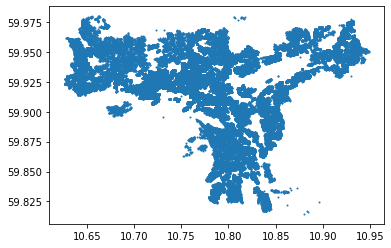

In [24]:
plt.scatter(df_latlng["lng"],df_latlng["lat"], s=1)
plt.show()

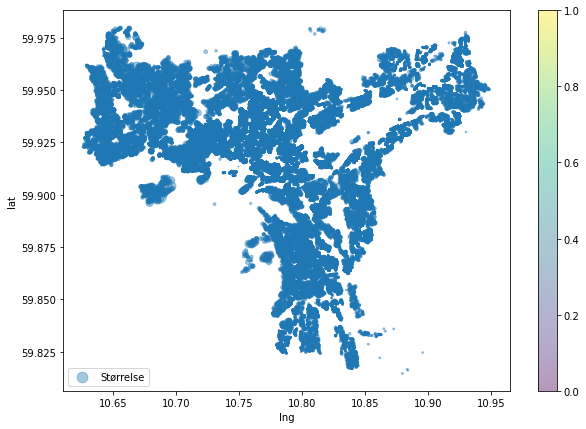

In [25]:
df_latlng.plot(kind = "scatter", 
                x = "lng", 
                y = "lat", 
                alpha = 0.4,                        # blending value, between 0 (transparent) and 1 (opaque).
                s = df_latlng["price"]/1000000,   # The marker size according to population
                label = "Størrelse",               # The label of the timeseries used in legend  
                figsize = (10,7),                   # Figure size
                #c = "price",           # color dependent on feature house value
                cmap = plt.get_cmap("jet"),         # color map in case that c is an array of floats
                colorbar = True,
                sharex = False)                     #  each subplot x- or y-axis will be independent  

plt.legend()
plt.show()


# Try to put an error into cmap then you get a suggestion of all the possibilities


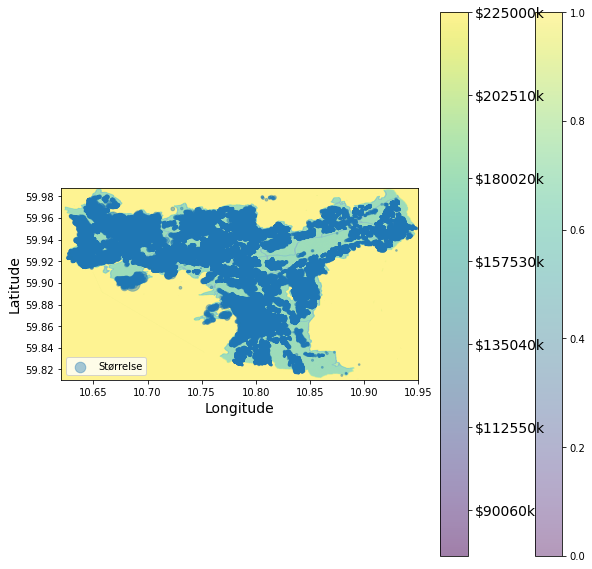

In [26]:
oslo_img=mpimg.imread('oslo.png')

ax = df_latlng.plot(kind = "scatter", 
                x = "lng", 
                y = "lat", 
                alpha = 0.4,                        # blending value, between 0 (transparent) and 1 (opaque).
                s = df_latlng["price"]/1000000,   # The marker size according to population
                label = "Størrelse",               # The label of the timeseries used in legend  
                figsize = (10,10),                   # Figure size
                #c = "price",           # color dependent on feature house value
                cmap = plt.get_cmap("jet"),         # color map in case that c is an array of floats
                colorbar = True,
                sharex = False)  

plt.imshow(oslo_img,
           extent=[10.62, 10.95, 59.81, 59.988],
           alpha=0.5,
           #cmap=plt.get_cmap("jet")
           )
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = df_latlng["price"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
#cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=10)

plt.show()

In [27]:
df.head()

,documentDate,picturedate,lastchanged,adcreated,price,listprice,lat,lng,address,apartmentnumber,...,N_modernisering,N_oppussing,N_regulert,N_garasjemulighet,postcode,Parking,price_inc_debt,area_id,Bydel_lat,Bydel_lng
0,2020-09-25,2020/7,2020-08-07,2020-08-03,5150000,4650000.0,59.913030,10.776672,"Hagegata 41, 0653 Oslo",H0703,...,False,False,False,False,653,1,5150000.0,1,59.911832,10.789224
1,2020-09-29,2020/8,2020-12-14,2020-08-25,3900000,3650000.0,59.918900,10.647900,"Skogbrynet 16D, 0283 Oslo",U0101,...,False,False,False,False,283,1,3944838.0,6,59.927271,10.664877
2,2021-12-02,2021/8,2021-08-01,2021-07-27,9900000,8750000.0,59.879000,10.799300,"Ringshusveien 8B, 1176 Oslo",H0101,...,False,True,False,False,1176,1,9900000.0,14,59.875677,10.789629
3,2009-11-12,4/186,2009-09-05,2009-08-24,1660000,1680000.0,59.887690,10.802634,"Libakkfaret 1 A, 1184 Oslo",H0302,...,False,False,False,False,1184,0,1678207.0,14,59.875677,10.789629
4,2012-10-24,2012/6,2012-06-15,2012-06-01,5760000,5490000.0,59.944653,10.888134,"Micheletveien 20, 1053 Oslo",U0102,...,False,False,False,False,1053,0,5760000.0,12,59.935980,10.877371


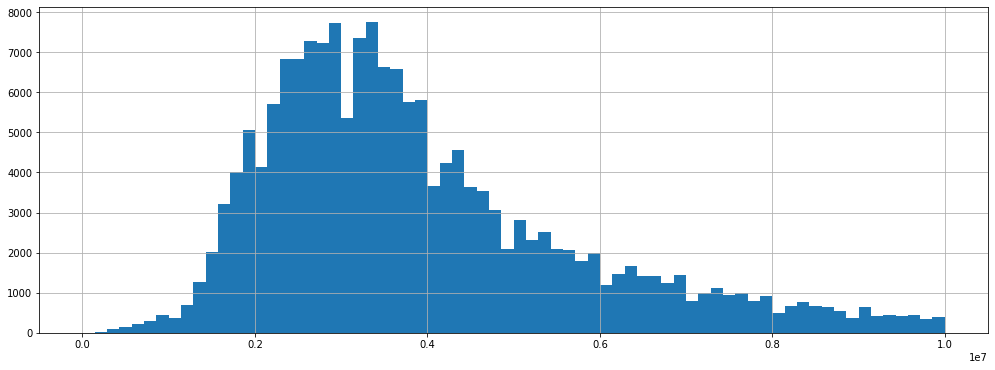

In [28]:
df['price'].hist(bins=70, range=[0,10000000], figsize=(17,6))
plt.show()

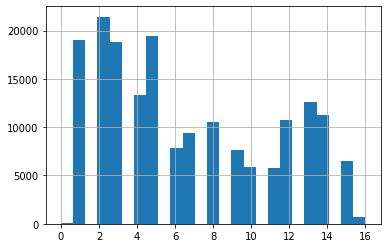

In [29]:
df["area_id"].hist(bins=25)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7a076037-bdbc-4d12-92b5-75ebface7fab' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>